# Asset Interpretter
The Following cell collects the massive dataset from "alleghenyassetmap.csv" and compacts it down into "assets.csv" which for all assets now holds only the asset's name, neighborhood in which it resides, and the tyoe of asset that it is. The neighborhood was not within the data so it had to be determined for each. *It takes a long time to run as the dataset is large*

In [1]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 
  
  
# default dict to determine type
def def_value(): 
    return 'string'
# initialize coords from csv
d = defaultdict(def_value) 
d["latitude"] = 'float'
d["longitude"] = 'float'
d["_id"] = 'int'
d["name"] = 'str'

# places and assets
places = pd.read_csv("alleghenyassetmap.csv", usecols=['_id', 'name', 'asset_type', 'latitude', 'longitude'], index_col="_id", dtype=d)
assets = pd.DataFrame(columns=('name', 'asset_type', 'neighborhood',))


#for every lat and long determine neighborhood and add the information to a csv
for index, row in places.iterrows():
    # Latitude & Longitude input
    Latitude = row['latitude']
    Longitude = row['longitude']

    location = fpsnippets.geo_to_neighborhood(Latitude, Longitude)
    
    if location != None :
        # data in this row
        new_row = pd.Series(
            {"name": row['name'],
             "asset_type": row['asset_type'],
             "neighborhood": location})
        #append row's data to assets
        assets = pd.concat([assets, new_row.to_frame().T], ignore_index=True)
        
#assets ro csv: relevantplaces.csv
assets.to_csv('assets.csv', sep=',', index=False, encoding='utf-8')
        

# Count of Restaurants by Neighborhood

The following code block takes the simplified data from "assets.csv" and counts how many of a desired asset (restauraunts in this case) each neighborhood has, it puts this data in "neighborhood_counts.csv" as well as graphs it visually

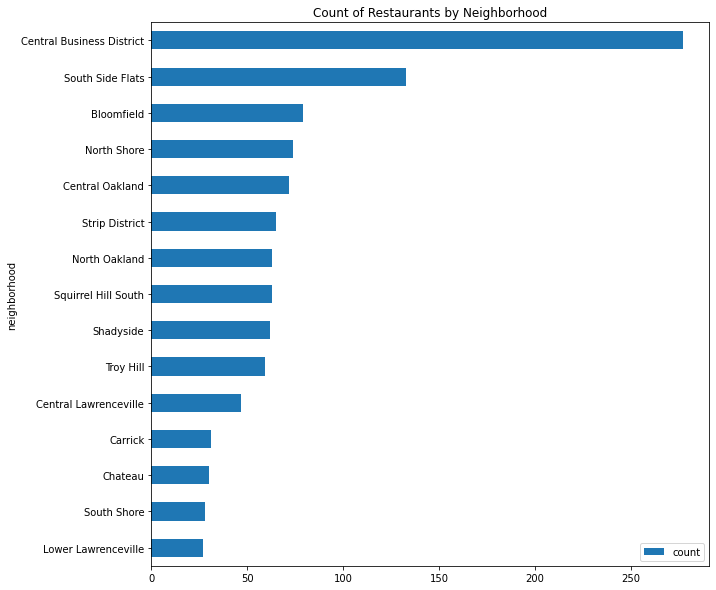

In [2]:
import pandas as pd
import csv
import fpsnippets
from collections import defaultdict 

# places and relevant places
assets = pd.read_csv("assets.csv", usecols=['name', 'asset_type', 'neighborhood'], dtype=str)
desired_asset = 'restaurants'

all_desired_assets = assets[assets['asset_type'] == desired_asset]

# Group by 'neighborhood' and count the number of the desired assets in each neighborhood
neighborhood_counts = all_desired_assets.groupby('neighborhood').size().reset_index(name='restaurant_count')
neighborhood_counts.columns = ['neighborhood', 'count']
neighborhood_counts = neighborhood_counts.sort_values(by='count', ascending=True)


# Save the result to a new CSV file
neighborhood_counts.to_csv('neighborhood_counts.csv', index=False)
ax = neighborhood_counts.tail(15).plot.barh(x='neighborhood', y='count', figsize=(10, 10,), title='Count of '+desired_asset.capitalize()+' by Neighborhood')